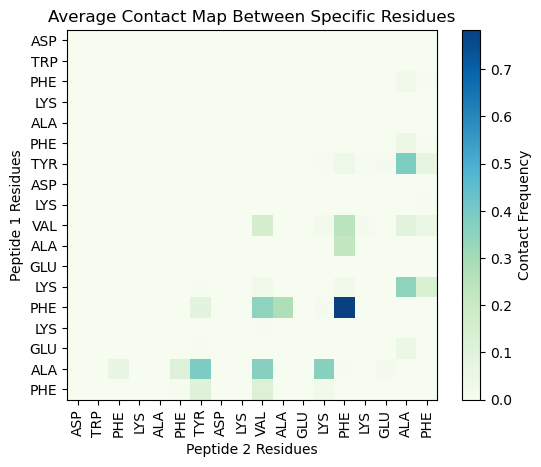

In [46]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory and topology
u = mda.Universe('step4.0_minimization.gro', 'center_pep_500.xtc')





# Define the residue names of interest
residues_of_interest = ['ALA', 'ASP', 'GLU', 'LYS', 'PHE', 'TRP', 'TYR', 'VAL']


# Select residues in each peptide
peptide1_residues = u.select_atoms('index 0-321 and (resname {})'.format(' or resname '.join(residues_of_interest)))
peptide2_residues = u.select_atoms('index 322-643 and (resname {})'.format(' or resname '.join(residues_of_interest)))

# Initialize a matrix to store contacts
contact_map = np.zeros((len(peptide1_residues.residues), len(peptide2_residues.residues), len(u.trajectory)))

# Contact threshold
threshold = 6  # In amg

# Calculate the contacts
for ts in u.trajectory:
    for i, res1 in enumerate(peptide1_residues.residues):
        for j, res2 in enumerate(peptide2_residues.residues):
            distance = mda.lib.distances.distance_array(res1.atoms.center_of_mass(), res2.atoms.center_of_mass())[0][0]
            contact_map[i, j, ts.frame] = distance < threshold

# Average the contact map over all frames
avg_contact_map = np.mean(contact_map, axis=2)

# Visualize the average contact map
plt.imshow(avg_contact_map, cmap='GnBu', interpolation='none')
plt.xlabel('Peptide 2 Residues')
plt.ylabel('Peptide 1 Residues')
plt.xticks(ticks=range(len(peptide2_residues.residues)), labels=[res.resname for res in peptide2_residues.residues], rotation=90)
plt.yticks(ticks=range(len(peptide1_residues.residues)), labels=[res.resname for res in peptide1_residues.residues])
plt.title('Average Contact Map Between Specific Residues')
plt.colorbar(label='Contact Frequency')
plt.show()


In [ ]:
#in water insigit from exp# #com of side chain residue#

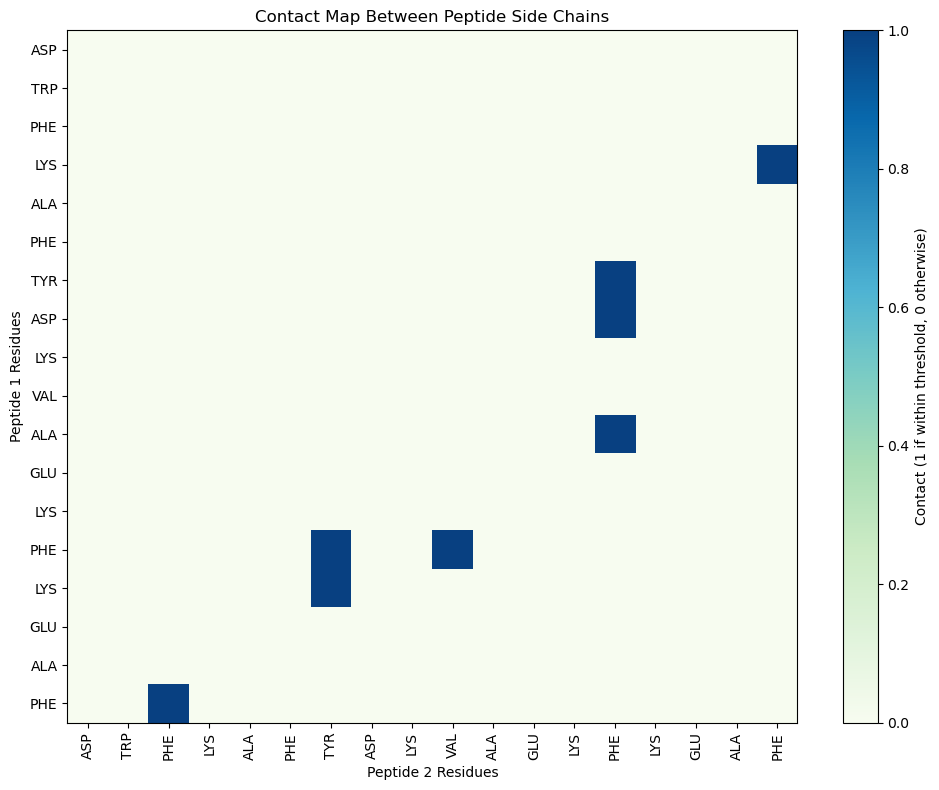

In [7]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory and topology
u = mda.Universe('step4.0_minimization.gro', 'center_pep_500.xtc')

# Define the residue names of interest
residues_of_interest = ['ALA', 'ASP', 'GLU', 'LYS', 'PHE', 'TRP', 'TYR', 'VAL']

# Function to select side chain atoms, excluding backbone atoms
def select_side_chain_atoms(residue):
    # Exclude backbone atoms; include hydrogen atoms in side chain if present
    return residue.atoms.select_atoms("not name N C CA O and not type H")

# Select residues in each peptide
peptide1_residues = u.select_atoms('index 0-321 and (resname {})'.format(' or resname '.join(residues_of_interest)))
peptide2_residues = u.select_atoms('index 322-643 and (resname {})'.format(' or resname '.join(residues_of_interest)))


# Initialize a matrix to store contacts
num_residues_peptide1 = len(peptide1_residues.residues)
num_residues_peptide2 = len(peptide2_residues.residues)
contact_map = np.zeros((num_residues_peptide1, num_residues_peptide2))

# Contact threshold in Ångström
threshold = 6.0

# Assuming you're interested in the first frame or a specific frame
u.trajectory[0]  # Or any frame you're interested in

# Calculate the contacts based on side chain center of mass
for i, res1 in enumerate(peptide1_residues.residues):
    com1 = select_side_chain_atoms(res1).center_of_mass()
    for j, res2 in enumerate(peptide2_residues.residues):
        com2 = select_side_chain_atoms(res2).center_of_mass()
        distance = np.linalg.norm(com1 - com2)
        if distance < threshold:
            contact_map[i, j] = 1  # Mark contact

# Visualize the contact map
plt.figure(figsize=(10, 8))
plt.imshow(contact_map, cmap='GnBu', interpolation='none', aspect='auto')
plt.colorbar(label='Contact (1 if within threshold, 0 otherwise)')
plt.title('Contact Map Between Peptide Side Chains')
plt.xlabel('Peptide 2 Residues')
plt.ylabel('Peptide 1 Residues')
plt.xticks(ticks=np.arange(num_residues_peptide2), labels=[res.resname for res in peptide2_residues.residues], rotation=90)
plt.yticks(ticks=np.arange(num_residues_peptide1), labels=[res.resname for res in peptide1_residues.residues])
plt.tight_layout()
plt.show()


In [41]:
#### dock strcture of 4F in water 

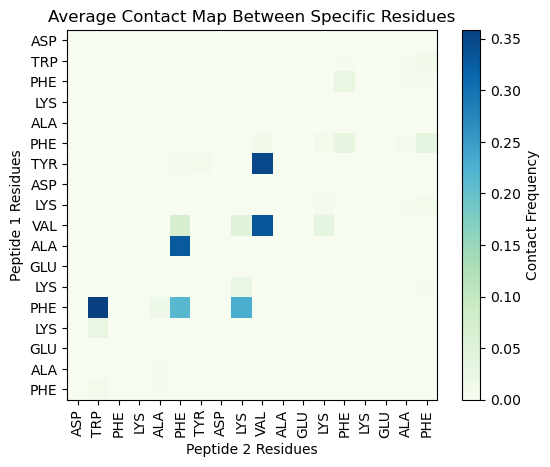

In [47]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory and topology
u = mda.Universe('/home/ravi1/phd/construction/model_peptides/4F/old_files/dock/charmm-gui-8733314279/gromacs/step4.0_minimization.gro', '/home/ravi1/phd/construction/model_peptides/4F/old_files/dock/charmm-gui-8733314279/gromacs/center_pep_500.xtc')

# Define the residue names of interest
residues_of_interest = ['ALA', 'ASP', 'GLU', 'LYS', 'PHE', 'TRP', 'TYR', 'VAL']

# Select residues in each peptide
peptide1_residues = u.select_atoms('index 0-321 and (resname {})'.format(' or resname '.join(residues_of_interest)))
peptide2_residues = u.select_atoms('index 322-643 and (resname {})'.format(' or resname '.join(residues_of_interest)))

# Initialize a matrix to store contacts
contact_map = np.zeros((len(peptide1_residues.residues), len(peptide2_residues.residues), len(u.trajectory)))

# Contact threshold
threshold = 6 # In amg

# Calculate the contacts
for ts in u.trajectory:
    for i, res1 in enumerate(peptide1_residues.residues):
        for j, res2 in enumerate(peptide2_residues.residues):
            distance = mda.lib.distances.distance_array(res1.atoms.center_of_mass(), res2.atoms.center_of_mass())[0][0]
            contact_map[i, j, ts.frame] = distance < threshold

# Average the contact map over all frames
avg_contact_map = np.mean(contact_map, axis=2)

# Visualize the average contact map
plt.imshow(avg_contact_map, cmap='GnBu', interpolation='none')
plt.xlabel('Peptide 2 Residues')
plt.ylabel('Peptide 1 Residues')
plt.xticks(ticks=range(len(peptide2_residues.residues)), labels=[res.resname for res in peptide2_residues.residues], rotation=90)
plt.yticks(ticks=range(len(peptide1_residues.residues)), labels=[res.resname for res in peptide1_residues.residues])
plt.title('Average Contact Map Between Specific Residues')
plt.colorbar(label='Contact Frequency')
plt.show()







In [ ]:
#docked strcture # com of side chain of the residue#

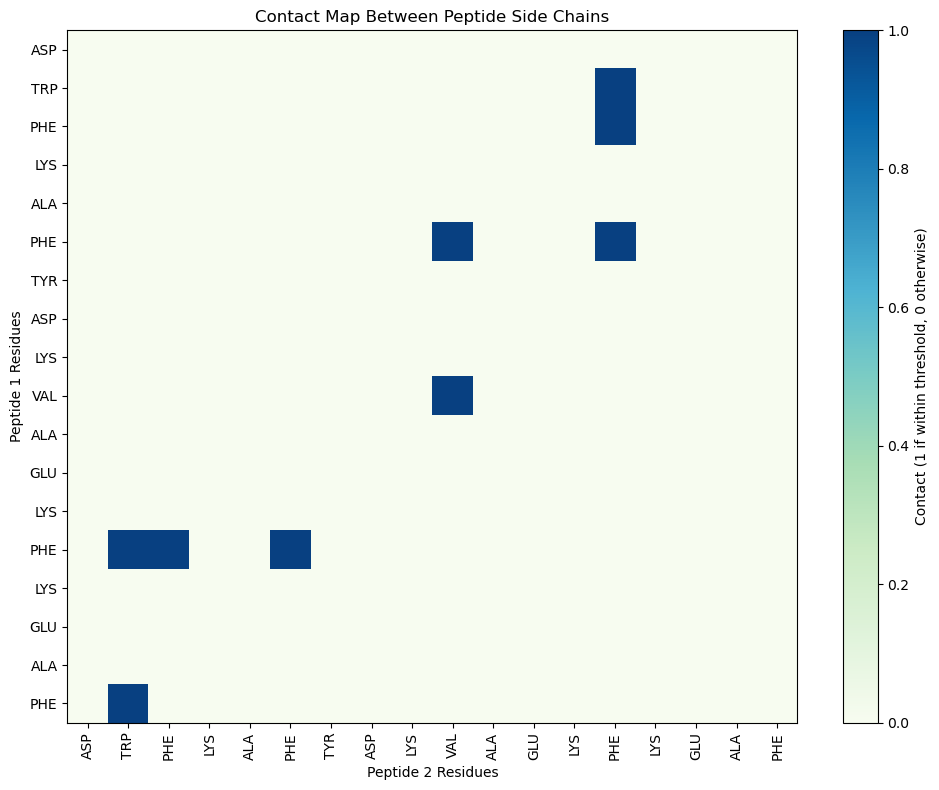

In [8]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory and topology

# Load the trajectory and topology
u = mda.Universe('/home/ravi1/phd/construction/model_peptides/4F/old_files/dock/charmm-gui-8733314279/gromacs/step4.0_minimization.gro', '/home/ravi1/phd/construction/model_peptides/4F/old_files/dock/charmm-gui-8733314279/gromacs/center_pep_500.xtc')


# Define the residue names of interest
residues_of_interest = ['ALA', 'ASP', 'GLU', 'LYS', 'PHE', 'TRP', 'TYR', 'VAL']

# Function to select side chain atoms, excluding backbone atoms
def select_side_chain_atoms(residue):
    # Exclude backbone atoms; include hydrogen atoms in side chain if present
    return residue.atoms.select_atoms("not name N C CA O and not type H")

# Select residues in each peptide
peptide1_residues = u.select_atoms('index 0-321 and (resname {})'.format(' or resname '.join(residues_of_interest)))
peptide2_residues = u.select_atoms('index 322-643 and (resname {})'.format(' or resname '.join(residues_of_interest)))


# Initialize a matrix to store contacts
num_residues_peptide1 = len(peptide1_residues.residues)
num_residues_peptide2 = len(peptide2_residues.residues)
contact_map = np.zeros((num_residues_peptide1, num_residues_peptide2))

# Contact threshold in Ångström
threshold = 6.0

# Assuming you're interested in the first frame or a specific frame
u.trajectory[0]  # Or any frame you're interested in

# Calculate the contacts based on side chain center of mass
for i, res1 in enumerate(peptide1_residues.residues):
    com1 = select_side_chain_atoms(res1).center_of_mass()
    for j, res2 in enumerate(peptide2_residues.residues):
        com2 = select_side_chain_atoms(res2).center_of_mass()
        distance = np.linalg.norm(com1 - com2)
        if distance < threshold:
            contact_map[i, j] = 1  # Mark contact

# Visualize the contact map
plt.figure(figsize=(10, 8))
plt.imshow(contact_map, cmap='GnBu', interpolation='none', aspect='auto')
plt.colorbar(label='Contact (1 if within threshold, 0 otherwise)')
plt.title('Contact Map Between Peptide Side Chains')
plt.xlabel('Peptide 2 Residues')
plt.ylabel('Peptide 1 Residues')
plt.xticks(ticks=np.arange(num_residues_peptide2), labels=[res.resname for res in peptide2_residues.residues], rotation=90)
plt.yticks(ticks=np.arange(num_residues_peptide1), labels=[res.resname for res in peptide1_residues.residues])
plt.tight_layout()
plt.show()


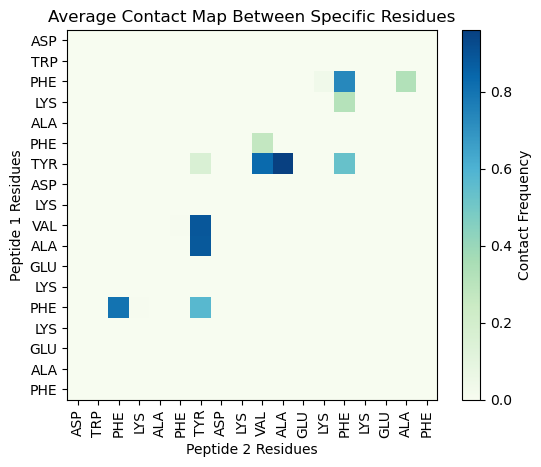

In [50]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory and topology
u = mda.Universe('/home/ravi1/phd/4F_apoa1/new_method/12_dimer/charmm-gui-9703401242/gromacs/step4.1_equilibration.gro', '/home/ravi1/phd/4F_apoa1/new_method/12_dimer/charmm-gui-9703401242/gromacs/step5_production.xtc')

# Define the residue names of interest
residues_of_interest = ['ALA', 'ASP', 'GLU', 'LYS', 'PHE', 'TRP', 'TYR', 'VAL']

# Select residues in each peptide
peptide1_residues = u.select_atoms('index 0-321 and (resname {})'.format(' or resname '.join(residues_of_interest)))
peptide2_residues = u.select_atoms('index 322-643 and (resname {})'.format(' or resname '.join(residues_of_interest)))

# Initialize a matrix to store contacts
contact_map = np.zeros((len(peptide1_residues.residues), len(peptide2_residues.residues), len(u.trajectory)))

# Contact threshold
threshold = 6 # In amg

# Calculate the contacts
for ts in u.trajectory:
    for i, res1 in enumerate(peptide1_residues.residues):
        for j, res2 in enumerate(peptide2_residues.residues):
            distance = mda.lib.distances.distance_array(res1.atoms.center_of_mass(), res2.atoms.center_of_mass())[0][0]
            contact_map[i, j, ts.frame] = distance < threshold

# Average the contact map over all frames
avg_contact_map = np.mean(contact_map, axis=2)

# Visualize the average contact map
plt.imshow(avg_contact_map, cmap='GnBu', interpolation='none')
plt.xlabel('Peptide 2 Residues')
plt.ylabel('Peptide 1 Residues')
plt.xticks(ticks=range(len(peptide2_residues.residues)), labels=[res.resname for res in peptide2_residues.residues], rotation=90)
plt.yticks(ticks=range(len(peptide1_residues.residues)), labels=[res.resname for res in peptide1_residues.residues])
plt.title('Average Contact Map Between Specific Residues')
plt.colorbar(label='Contact Frequency')
plt.show()


In [52]:
##all the pairs 10dimer and 4f###

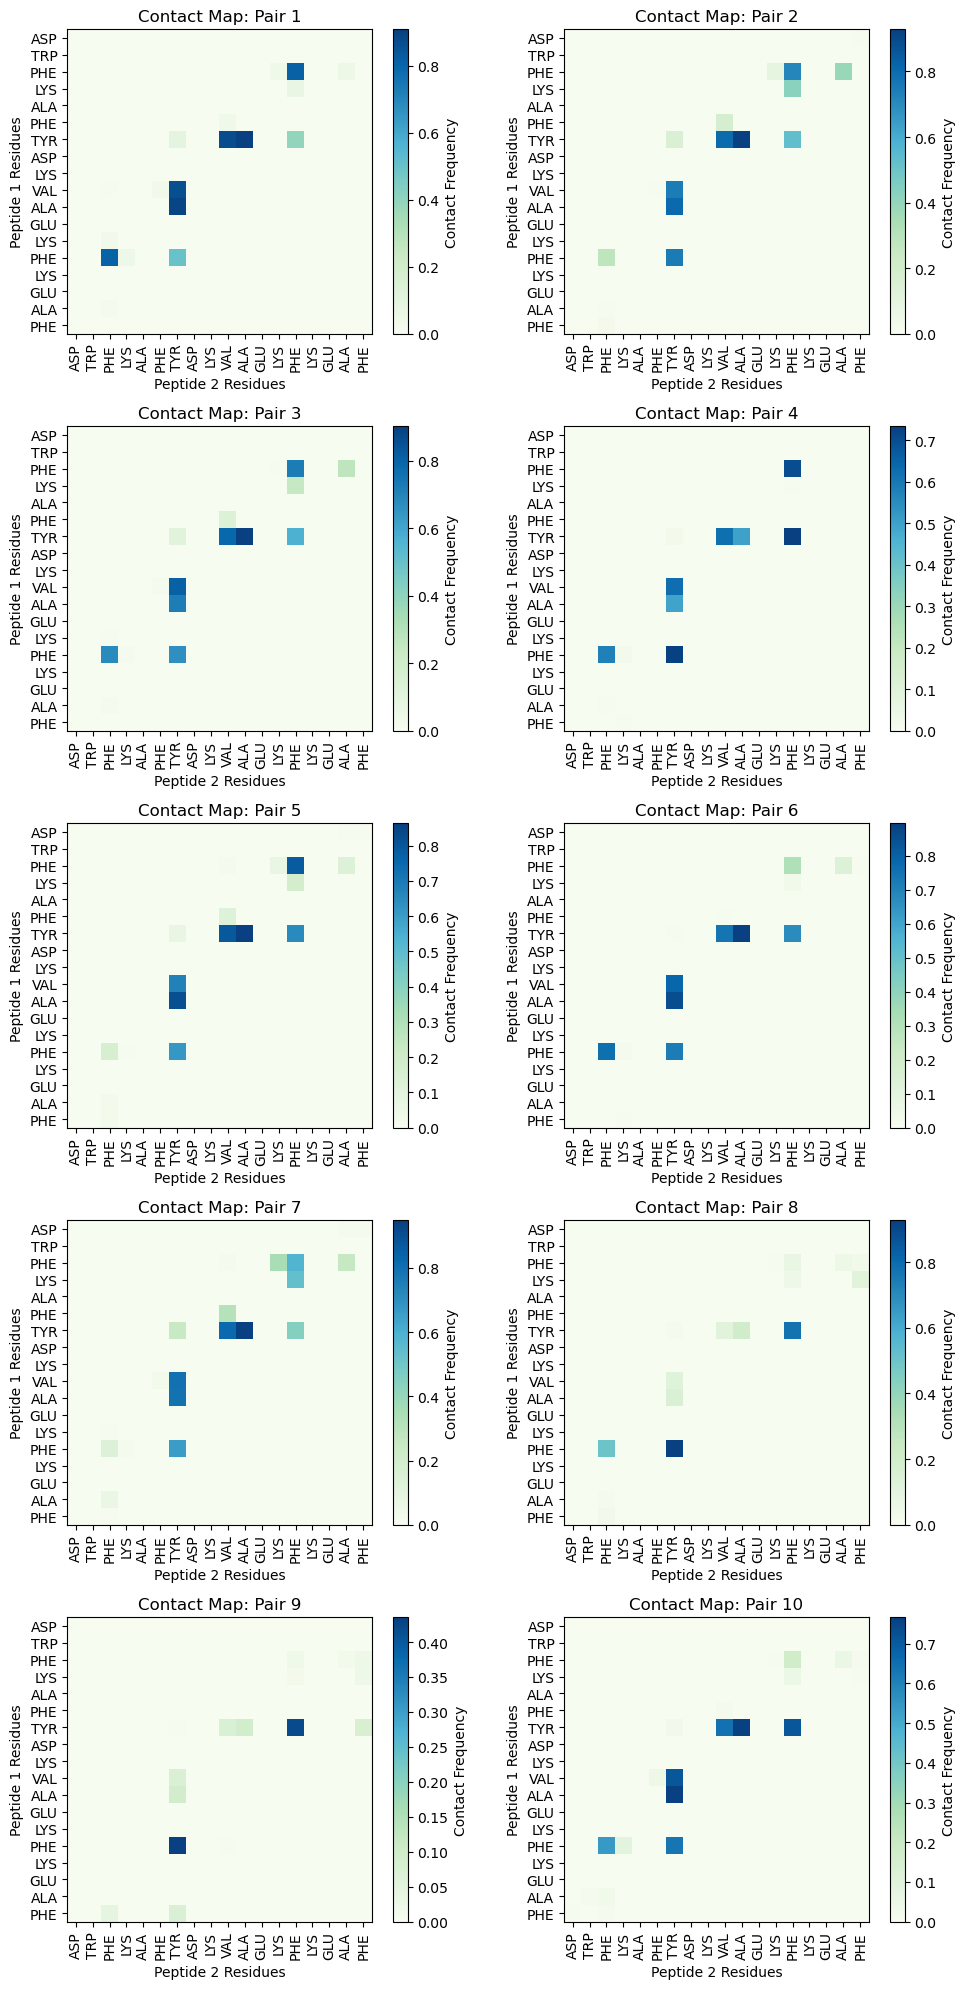

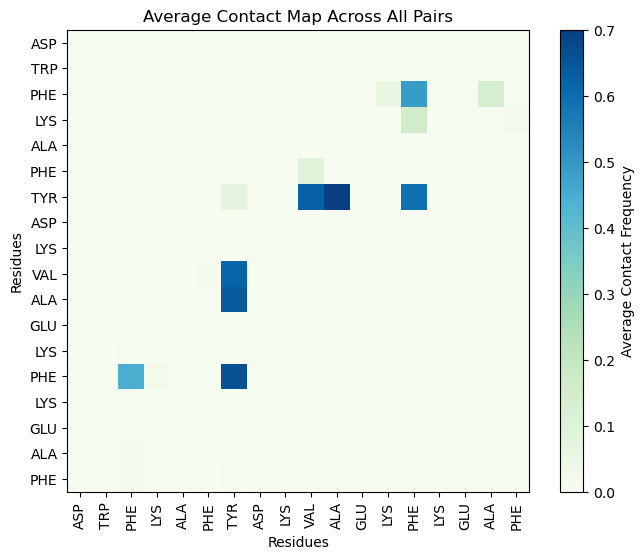

In [2]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory and topology
u = mda.Universe('/home/ravi1/phd/4F_apoa1/new_method/10_dimers/10_dimer_186/cubic_big/charmm-gui-9685421474/gromacs/step4.0_minimization.gro', '/home/ebam/ravi1/phd/4F_apoa1/new_method/10_dimers/10_dimer_186/cubic_big/charmm-gui-9685421474/gromacs/step5_production.xtc')


# Define the residue names of interest
residues_of_interest = ['ALA', 'ASP', 'GLU', 'LYS', 'PHE', 'TRP', 'TYR', 'VAL']

peptide_pairs = [
    ((0, 321), (322, 643)),       # Pair 1
    ((644, 965), (966, 1287)),    # Pair 2
    ((1288, 1609), (1610, 1931)), # Pair 3
    ((1932, 2253), (2254, 2575)), # Pair 4
    ((2576, 2897), (2898, 3219)), # Pair 5
    ((3220, 3541), (3542, 3863)), # Pair 6
    ((3864, 4185), (4186, 4507)), # Pair 7
    ((4508, 4829), (4830, 5151)), # Pair 8
    ((5152, 5473), (5474, 5795)), # Pair 9
    ((5796, 6117), (6118, 6439))  # Pair 10
]


# Initialize variables to store aggregated contact maps
sum_contact_maps = None
num_pairs = len(peptide_pairs)

# Initialize a figure for the individual plots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))

# Contact threshold
threshold = 6 # In Ångström

# Loop over each peptide pair
for pair_idx, ((start_idx1, end_idx1), (start_idx2, end_idx2)) in enumerate(peptide_pairs):
    # Select residues for each peptide
    peptide1_residues = u.select_atoms(f'index {start_idx1}:{end_idx1} and resname {" ".join(residues_of_interest)}')
    peptide2_residues = u.select_atoms(f'index {start_idx2}:{end_idx2} and resname {" ".join(residues_of_interest)}')

    # Initialize a matrix to store contacts for this pair
    contact_map = np.zeros((len(peptide1_residues.residues), len(peptide2_residues.residues), len(u.trajectory)))

    # Calculate the contacts for this pair
    for ts in u.trajectory:
        for i, res1 in enumerate(peptide1_residues.residues):
            for j, res2 in enumerate(peptide2_residues.residues):
                distance = mda.lib.distances.distance_array(res1.atoms.center_of_mass(), res2.atoms.center_of_mass())[0][0]
                contact_map[i, j, ts.frame] = distance < threshold

    # Calculate the average contact map for this pair
    avg_contact_map = np.mean(contact_map, axis=2)

    # Aggregate the contact maps
    if sum_contact_maps is None:
        sum_contact_maps = avg_contact_map
    else:
        sum_contact_maps += avg_contact_map

    # Plot the individual contact map in a subplot
    ax = axes[pair_idx // 2, pair_idx % 2]
    cax = ax.imshow(avg_contact_map, cmap='GnBu', interpolation='none')
    ax.set_title(f'Contact Map: Pair {pair_idx + 1}')
    ax.set_xlabel('Peptide 2 Residues')
    ax.set_ylabel('Peptide 1 Residues')
    ax.set_xticks(range(len(peptide2_residues.residues)))
    ax.set_xticklabels([res.resname for res in peptide2_residues.residues], rotation=90)
    ax.set_yticks(range(len(peptide1_residues.residues)))
    ax.set_yticklabels([res.resname for res in peptide1_residues.residues])
    fig.colorbar(cax, ax=ax, label='Contact Frequency')

# Adjust layout of individual plots
fig.tight_layout()

# Average of all contact maps
average_of_all = sum_contact_maps / num_pairs

# Plot the final average contact map
plt.figure(figsize=(8, 6))
plt.imshow(average_of_all, cmap='GnBu', interpolation='none')
plt.colorbar(label='Average Contact Frequency')
plt.title('Average Contact Map Across All Pairs')
plt.xticks(ticks=range(len(peptide2_residues.residues)), labels=[res.resname for res in peptide2_residues.residues], rotation=90)
plt.yticks(ticks=range(len(peptide1_residues.residues)), labels=[res.resname for res in peptide1_residues.residues])
plt.xlabel('Residues')
plt.ylabel('Residues')
plt.show()

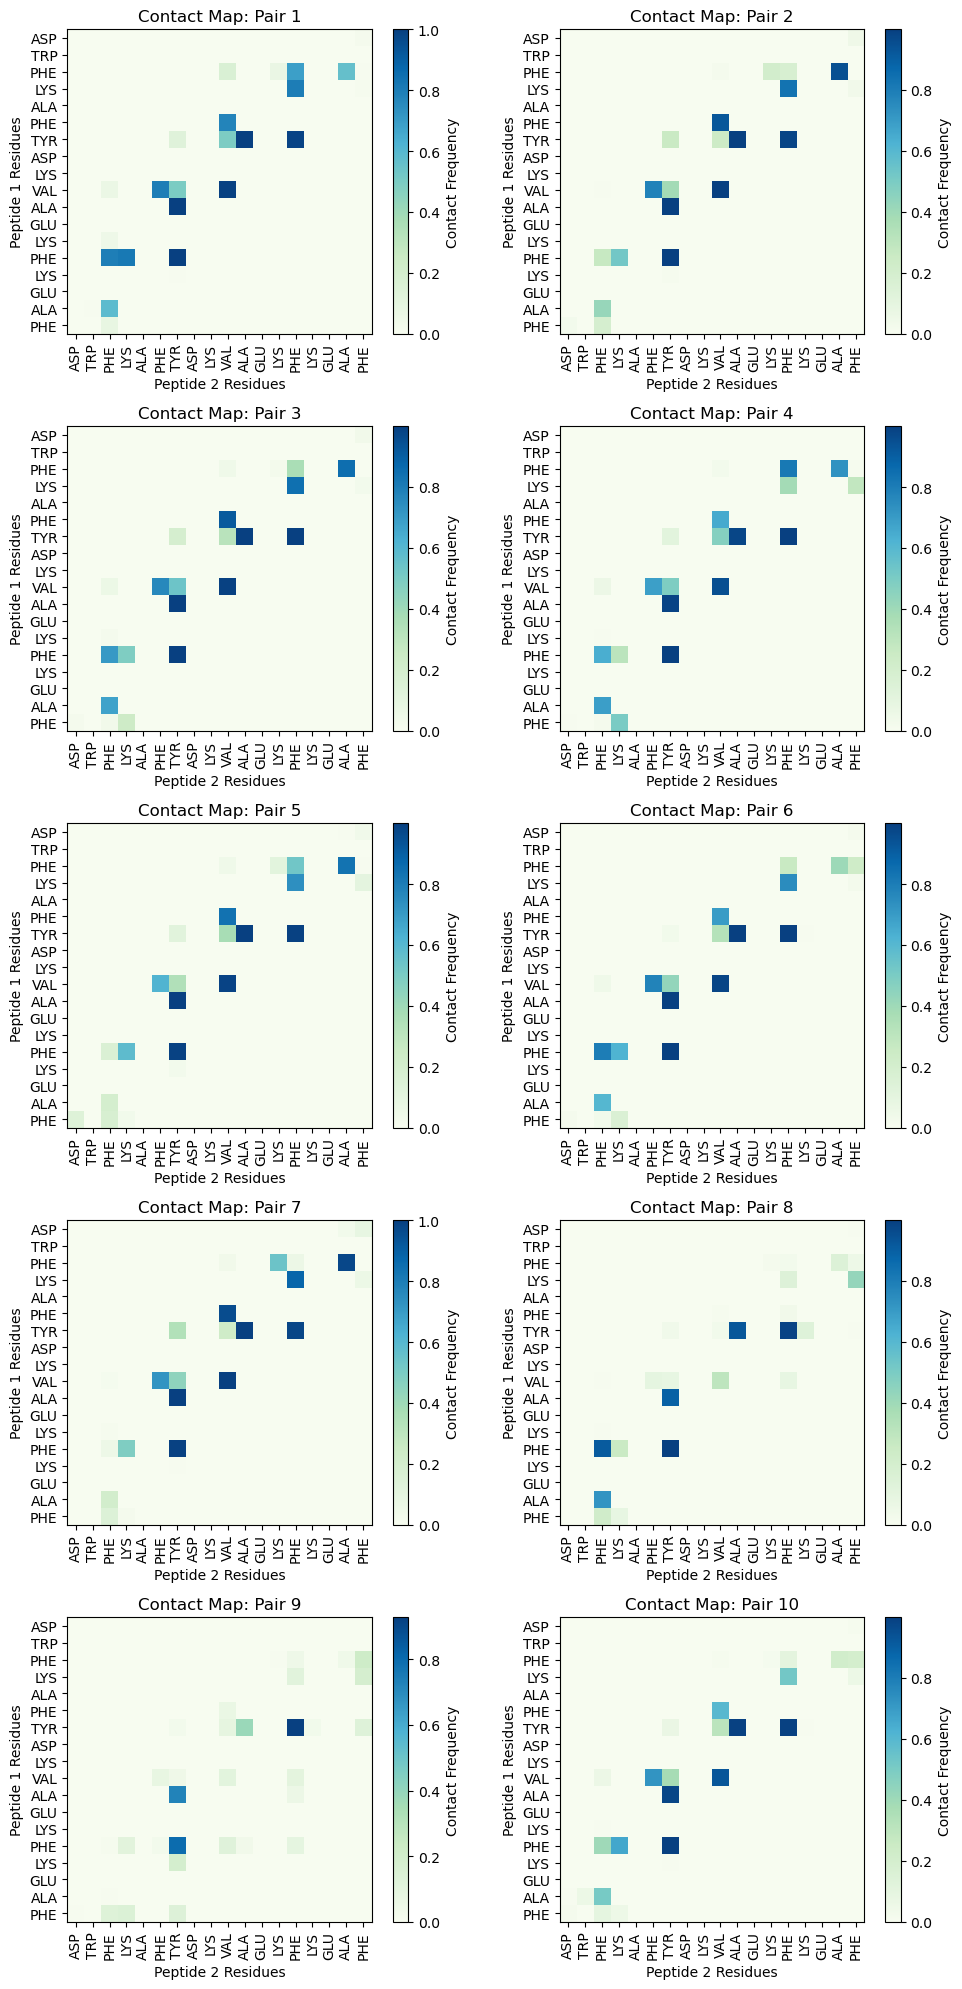

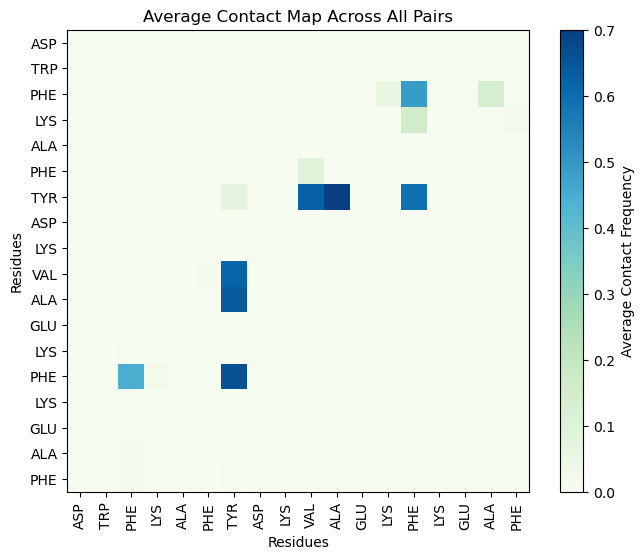

In [4]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

def select_side_chain_atoms(residue):
    """ Selects side chain atoms of a residue, excluding backbone atoms. """
    backbone_atoms = ['N', 'CA', 'C', 'O']
    return residue.atoms.select_atoms('not name ' + ' '.join(backbone_atoms))

# Load the trajectory and topology
u = mda.Universe('/home/ravi1/phd/4F_apoa1/new_method/10_dimers/10_dimer_186/cubic_big/charmm-gui-9685421474/gromacs/step4.0_minimization.gro', '/home/ebam/ravi1/phd/4F_apoa1/new_method/10_dimers/10_dimer_186/cubic_big/charmm-gui-9685421474/gromacs/step5_production.xtc')


# Define the residue names of interest
residues_of_interest = ['ALA', 'ASP', 'GLU', 'LYS', 'PHE', 'TRP', 'TYR', 'VAL']


peptide_pairs = [
    ((0, 321), (322, 643)),       # Pair 1
    ((644, 965), (966, 1287)),    # Pair 2
    ((1288, 1609), (1610, 1931)), # Pair 3
    ((1932, 2253), (2254, 2575)), # Pair 4
    ((2576, 2897), (2898, 3219)), # Pair 5
    ((3220, 3541), (3542, 3863)), # Pair 6
    ((3864, 4185), (4186, 4507)), # Pair 7
    ((4508, 4829), (4830, 5151)), # Pair 8
    ((5152, 5473), (5474, 5795)), # Pair 9
    ((5796, 6117), (6118, 6439))  # Pair 10
]

# Initialize variables to store aggregated contact maps
sum_contact_maps = None
num_pairs = len(peptide_pairs)

# Initialize a figure for the individual plots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))

# Contact threshold
threshold = 6 # In Ångström

# Loop over each peptide pair
for pair_idx, ((start_idx1, end_idx1), (start_idx2, end_idx2)) in enumerate(peptide_pairs):
    # Select residues for each peptide
    peptide1_residues = u.select_atoms(f'index {start_idx1}:{end_idx1} and resname {" ".join(residues_of_interest)}').residues
    peptide2_residues = u.select_atoms(f'index {start_idx2}:{end_idx2} and resname {" ".join(residues_of_interest)}').residues

    # Initialize a matrix to store contacts for this pair
    contact_map = np.zeros((len(peptide1_residues), len(peptide2_residues), len(u.trajectory)))

    # Calculate the contacts for this pair
    for ts in u.trajectory:
        for i, res1 in enumerate(peptide1_residues):
            for j, res2 in enumerate(peptide2_residues):
                # Use only side chain atoms for distance calculation
                side_chain1 = select_side_chain_atoms(res1)
                side_chain2 = select_side_chain_atoms(res2)

                if side_chain1.n_atoms == 0 or side_chain2.n_atoms == 0:
                    continue  # Skip if any of the residues lack side chain atoms

                distance = mda.lib.distances.distance_array(side_chain1.center_of_mass(), side_chain2.center_of_mass())[0][0]
                contact_map[i, j, ts.frame] = distance < threshold

    # Calculate the average contact map for this pair
    avg_contact_map = np.mean(contact_map, axis=2)

    # Aggregate the contact maps
    if sum_contact_maps is None:
        sum_contact_maps = avg_contact_map
    else:
        sum_contact_maps += avg_contact_map

    # Plot the individual contact map in a subplot
    ax = axes[pair_idx // 2, pair_idx % 2]
    cax = ax.imshow(avg_contact_map, cmap='GnBu', interpolation='none')
    ax.set_title(f'Contact Map: Pair {pair_idx + 1}')
    ax.set_xlabel('Peptide 2 Residues')
    ax.set_ylabel('Peptide 1 Residues')
    ax.set_xticks(range(len(peptide2_residues)))
    ax.set_xticklabels([res.resname for res in peptide2_residues], rotation=90)
    ax.set_yticks(range(len(peptide1_residues)))
    ax.set_yticklabels([res.resname for res in peptide1_residues])
    fig.colorbar(cax, ax=ax, label='Contact Frequency')

# Adjust layout of individual plots
fig.tight_layout()

# Plot the final average contact map
plt.figure(figsize=(8, 6))
plt.imshow(average_of_all, cmap='GnBu', interpolation='none')
plt.colorbar(label='Average Contact Frequency')
plt.title('Average Contact Map Across All Pairs')
plt.xticks(ticks=range(len(peptide2_residues.residues)), labels=[res.resname for res in peptide2_residues.residues], rotation=90)
plt.yticks(ticks=range(len(peptide1_residues.residues)), labels=[res.resname for res in peptide1_residues.residues])
plt.xlabel('Residues')
plt.ylabel('Residues')
plt.show()
